In [90]:
from sklearn.preprocessing import LabelBinarizer
from tensorflow import keras

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [91]:
train_df = pd.read_csv('data/alphabet/sign_mnist_train.csv')

In [92]:
train_df = train_df.sample(frac=1, random_state=42)

In [93]:
X, y = train_df.drop('label', axis=1), train_df['label']

In [94]:
X.shape, y.shape

((27455, 784), (27455,))

In [95]:
np.unique(X.dtypes), y.dtype

(array([dtype('int64')], dtype=object), dtype('int64'))

In [96]:
label_binarizer = LabelBinarizer()
y = label_binarizer.fit_transform(y)

In [97]:
X = X/255.0

In [98]:
np.unique(X.dtypes)

array([dtype('float64')], dtype=object)

In [99]:
X = tf.reshape(X, [-1, 28, 28, 1])

In [100]:
X.shape, y.shape

(TensorShape([27455, 28, 28, 1]), (27455, 24))

In [101]:
X_train, X_valid = X[:25000], X[25000:]
y_train, y_valid = y[:25000], y[25000:]

In [102]:
X_train[0].dtype

tf.float64

In [103]:
X_train[0].shape

TensorShape([28, 28, 1])

(<matplotlib.image.AxesImage at 0x201320c8640>,
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0]))

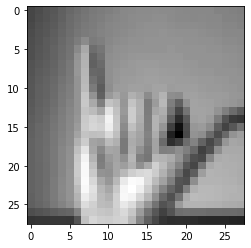

In [104]:
plt.imshow(X[0], cmap='gray'), y[2]

In [105]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (5, 5), padding="same", activation='relu', input_shape=(28, 28, 1)))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Conv2D(64, (5, 5), padding="same", activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Conv2D(128, (5, 5), padding="same", activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation="relu"))
model.add(keras.layers.Dense(24, activation="softmax"))

In [106]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 14, 14, 64)        51264     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 7, 7, 128)         204928    
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 3, 3, 128)       

In [107]:
model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"])

In [108]:
history = model.fit(X_train, y_train, epochs=15, validation_data=(X_valid, y_valid))

Epoch 1/15
782/782 [==============================] - 14s 16ms/step - loss: 0.7616 - accuracy: 0.7666 - val_loss: 0.0240 - val_accuracy: 0.9971
Epoch 2/15
782/782 [==============================] - 12s 16ms/step - loss: 0.0082 - accuracy: 0.9988 - val_loss: 0.0010 - val_accuracy: 1.0000
Epoch 3/15
782/782 [==============================] - 13s 16ms/step - loss: 5.1580e-04 - accuracy: 1.0000 - val_loss: 4.3567e-04 - val_accuracy: 1.0000
Epoch 4/15
782/782 [==============================] - 14s 17ms/step - loss: 2.0970e-04 - accuracy: 1.0000 - val_loss: 1.7155e-04 - val_accuracy: 1.0000
Epoch 5/15
782/782 [==============================] - 13s 16ms/step - loss: 1.0457e-04 - accuracy: 1.0000 - val_loss: 8.3123e-05 - val_accuracy: 1.0000
Epoch 6/15
782/782 [==============================] - 13s 17ms/step - loss: 5.7380e-05 - accuracy: 1.0000 - val_loss: 5.2299e-05 - val_accuracy: 1.0000
Epoch 7/15
782/782 [==============================] - 12s 15ms/step - loss: 3.3100e-05 - accuracy: 1.000

In [109]:
model.predict(X_valid[:1])

1/1 [==============================] - 0s 107ms/step


array([[5.72259483e-16, 3.24770883e-19, 2.74234357e-13, 2.58152285e-15,
        4.72158167e-21, 9.94885725e-17, 2.19710070e-10, 1.00000000e+00,
        1.86269427e-16, 9.36994114e-15, 7.82815544e-13, 5.89871150e-16,
        4.31165823e-08, 1.04545116e-12, 4.26364266e-13, 3.88483299e-12,
        1.35403511e-15, 4.03469957e-15, 4.97649556e-13, 4.77350527e-13,
        2.72222650e-14, 3.14034094e-18, 1.38449178e-14, 1.07699995e-10]],
      dtype=float32)

In [110]:
test_df = pd.read_csv('data/alphabet/sign_mnist_test.csv')

In [111]:
X_test, y_test = test_df.drop('label', axis=1), test_df['label']

In [112]:
X_test = tf.reshape(X_test, [-1, 28, 28, 1])

In [113]:
y_test = label_binarizer.transform(y_test)

In [114]:
model.evaluate(X_test, y_test)

225/225 [==============================] - 1s 5ms/step - loss: 33.4946 - accuracy: 0.9392


[33.49458312988281, 0.9392080307006836]

In [115]:
model.save('initial-end-to-end')

INFO:tensorflow:Assets written to: initial-end-to-end\assets


INFO:tensorflow:Assets written to: initial-end-to-end\assets
